In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('monthly_milk_production.csv')

In [3]:
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [4]:
df.isnull().sum()

Date          0
Production    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [6]:
df.Date = pd.to_datetime(df.Date,infer_datetime_format=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        168 non-null    datetime64[ns]
 1   Production  168 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [8]:
df.shape

(168, 2)

In [9]:
df.columns

Index(['Date', 'Production'], dtype='object')

In [10]:
df = df.set_index('Date')

In [11]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [12]:
import matplotlib.pyplot as plt

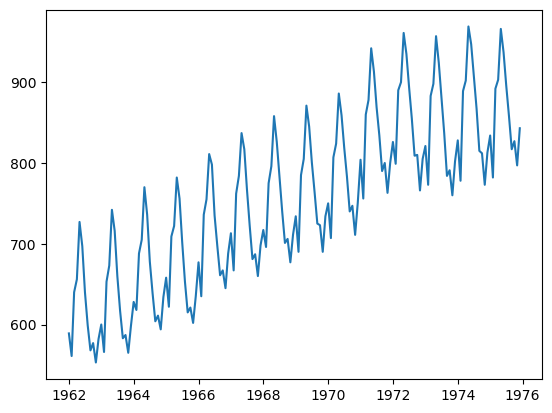

In [13]:
plt.plot(df)

<AxesSubplot:xlabel='Date'>

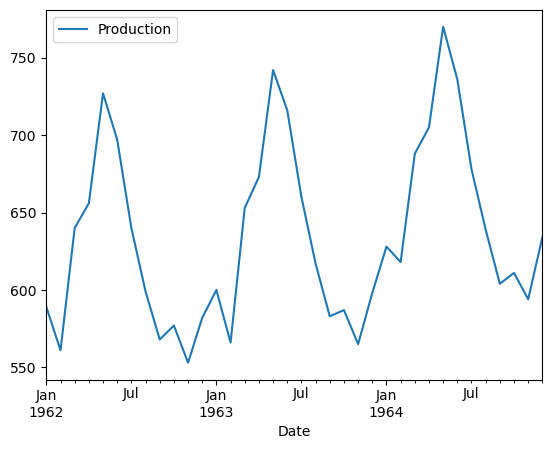

In [14]:
df[0:36].plot()

<AxesSubplot:xlabel='Date'>

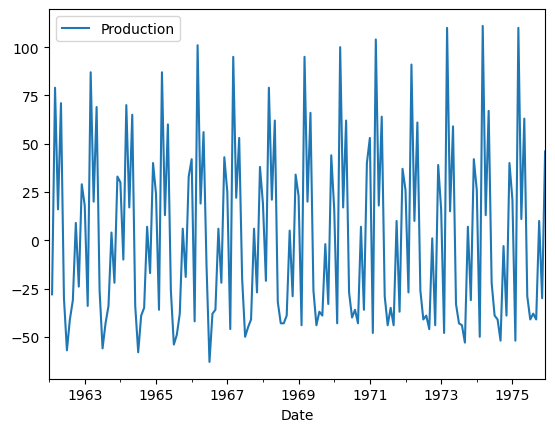

In [15]:
df.diff().plot()
# after level 1 differenceing data not stationary

<AxesSubplot:xlabel='Date'>

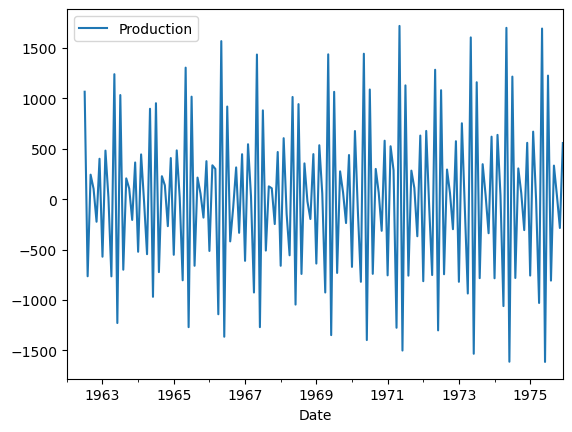

In [16]:
df.diff().diff().diff().diff().diff().diff().plot()

In [17]:
import numpy as np

In [18]:
# take a lag
df1 = np.log(df)

<AxesSubplot:xlabel='Date'>

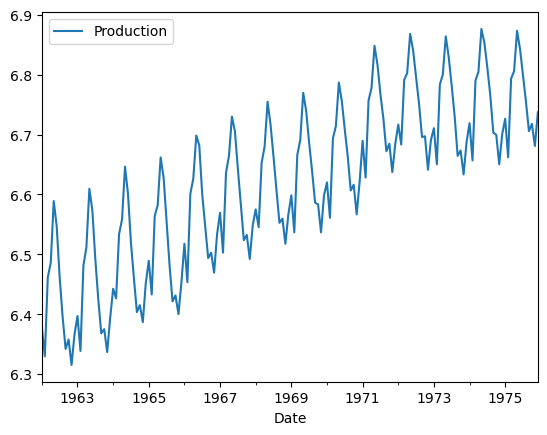

In [19]:
df1.plot()

<AxesSubplot:xlabel='Date'>

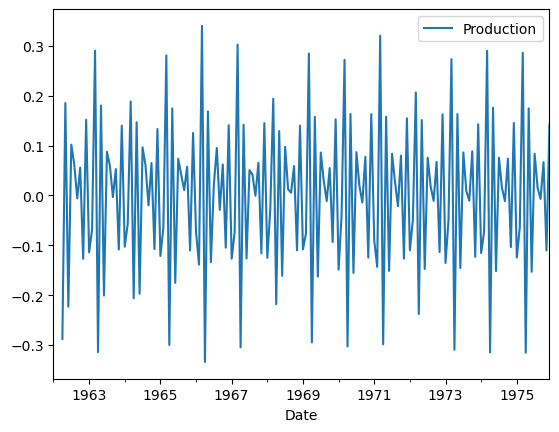

In [20]:
df1.diff().diff().diff().plot()

In [21]:
## to build a model we need to find value of P,Q,D---> D=1
# Now data is log data ...so we need to take antilog
# P? ..Q?  --> ACf, PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

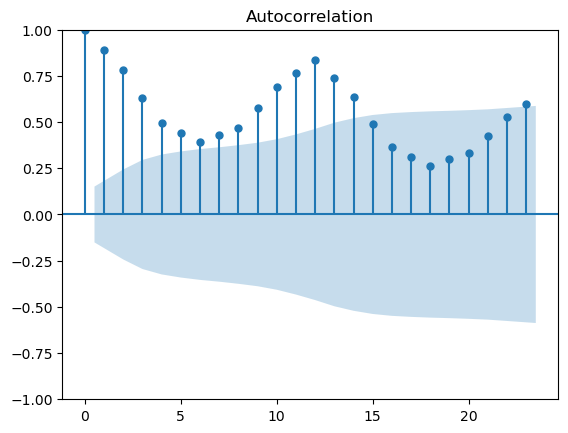

In [23]:
plot_acf(df1);

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


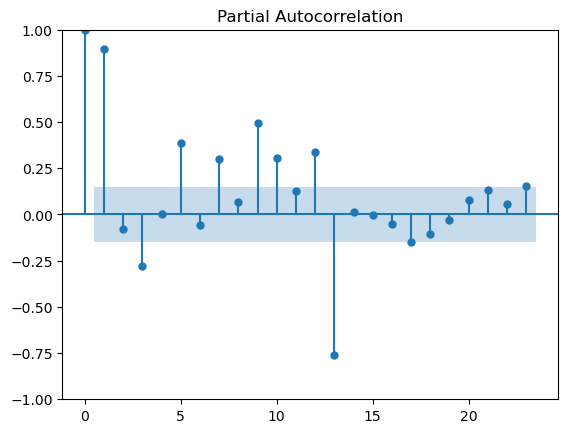

In [24]:
plot_pacf(df1);

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [26]:
dec_results = seasonal_decompose(df1)

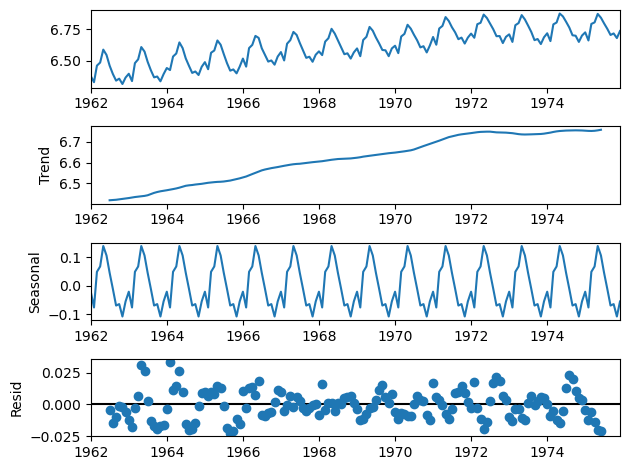

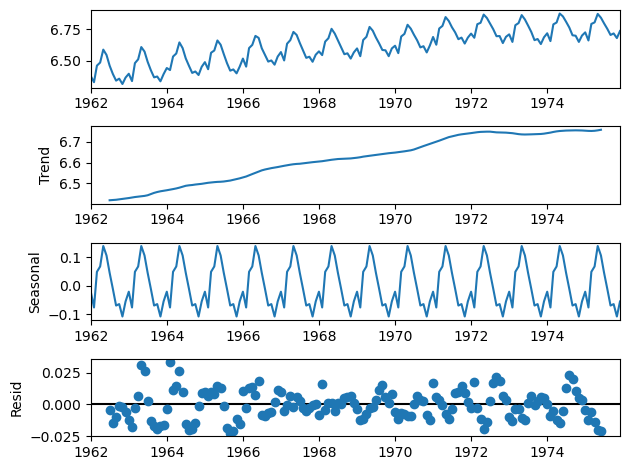

In [27]:
dec_results.plot()
# this is optional

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
auto_arima(df1,seasonal=True,m=12)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [30]:
model_sarima = SARIMAX(df1,order=(1, 1, 0), seasonal_order=(2, 0, 2, 12))

In [31]:
result_milk_prod = model_sarima.fit()

In [32]:
pred_log = result_milk_prod.predict(start = 168, end = 180)
#pred_log

In [33]:
pred_log

1976-01-01    6.765252
1976-02-01    6.707371
1976-03-01    6.835602
1976-04-01    6.849951
1976-05-01    6.918290
1976-06-01    6.889854
1976-07-01    6.844863
1976-08-01    6.799577
1976-09-01    6.743937
1976-10-01    6.749513
1976-11-01    6.705706
1976-12-01    6.758549
1977-01-01    6.787282
Freq: MS, Name: predicted_mean, dtype: float64

In [34]:
pred_actualscale = np.round(np.exp(pred_log))

In [35]:
pred_actualscale

1976-01-01     867.0
1976-02-01     818.0
1976-03-01     930.0
1976-04-01     944.0
1976-05-01    1011.0
1976-06-01     982.0
1976-07-01     939.0
1976-08-01     897.0
1976-09-01     849.0
1976-10-01     854.0
1976-11-01     817.0
1976-12-01     861.0
1977-01-01     887.0
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

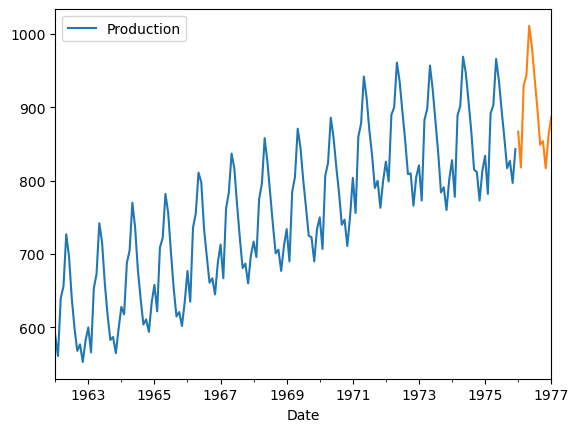

In [36]:
df.plot()  # originoal data
pred_actualscale.plot() # predicted / forcast values


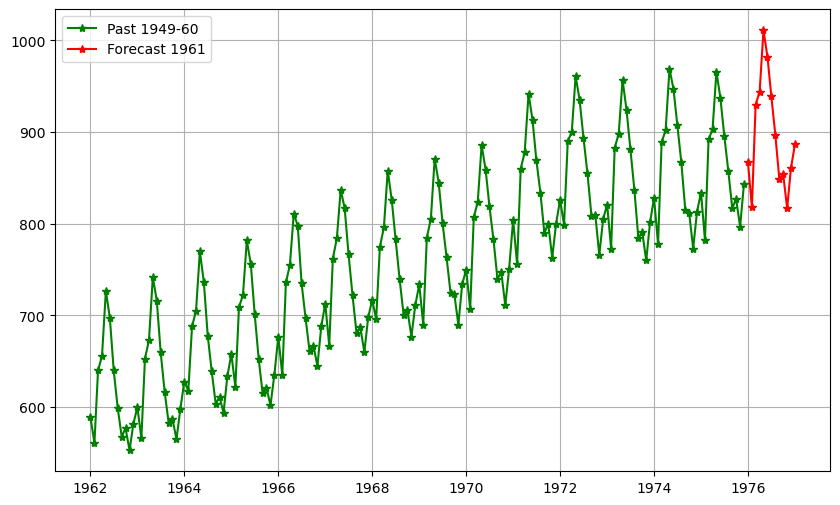

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df.Production, marker = "*",color = "green", label = 'Past 1949-60')
plt.plot(pred_actualscale,marker = "*",color = "red", label = 'Forecast 1961')
plt.legend()
plt.grid()

In [38]:
df1_train = df1.iloc[0:156]
df1_test = df1.iloc[156:]

In [39]:
df1_train

,Production
Date,
1962-01-01,6.378426
1962-02-01,6.329721
1962-03-01,6.461468
1962-04-01,6.486161
1962-05-01,6.588926
...,...
1974-08-01,6.765039
1974-09-01,6.703188
1974-10-01,6.699500


In [40]:
df1_test

,Production
Date,
1975-01-01,6.726233
1975-02-01,6.661855
1975-03-01,6.793466
1975-04-01,6.805723
1975-05-01,6.873164
1975-06-01,6.842683
1975-07-01,6.797940
1975-08-01,6.754604
1975-09-01,6.705639


In [41]:
model_sarima_train = SARIMAX(df1_train, order = (1, 1, 0), seasonal_order=(2, 0, 2, 12))

In [42]:
result_Production_train = model_sarima_train.fit()

In [43]:
pred_log_train = result_Production_train.predict(start = 156, end = 168 )

pred_log_train_actual_scale = np.exp(pred_log_train)

In [44]:
err = (df.iloc[156:].Production - pred_log_train_actual_scale)

In [45]:
np.mean(np.abs(err*100/(df.iloc[156:].Production)))

1.3025682393175646

In [46]:
pred_actual_df = pd.DataFrame()

In [47]:
pred_actual_df['Actual'] = df.iloc[156:].Production
pred_actual_df['Pred'] = np.round(pred_log_train_actual_scale)

In [48]:
pred_actual_df

,Actual,Pred
Date,,
1975-01-01,834,839.0
1975-02-01,782,793.0
1975-03-01,892,901.0
1975-04-01,903,916.0
1975-05-01,966,981.0
1975-06-01,937,954.0
1975-07-01,896,911.0
1975-08-01,858,869.0
1975-09-01,817,818.0


<AxesSubplot:xlabel='Date'>

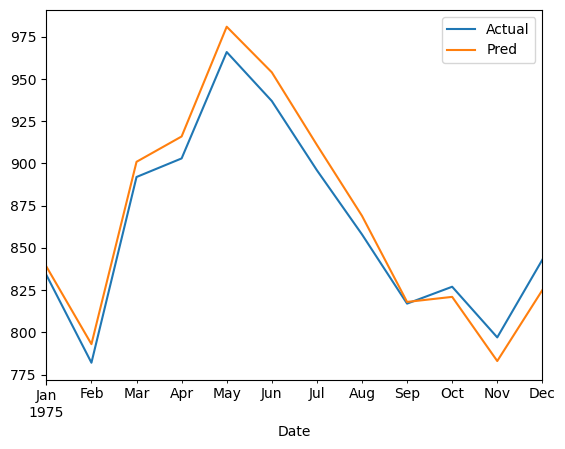

In [49]:
pred_actual_df.plot()